In [2]:
import numpy as np  #array
import matplotlib.pyplot as plt #plot diagram  
import pandas as pd  #membaca file csv

In [3]:
# Set and input dataset into KNN
dataset = pd.read_csv("DatasetGLCM.csv")
y = dataset['Class']
x = dataset.drop('Class',axis = 1)
x = x.drop('Citra', axis = 1)
i =len(x.columns)
x = x.drop(x.columns[i-1], axis = 1)
y.replace(('G1','G2','G3'),(0,1,2), inplace=True)#set class

In [4]:
# split training data and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=5)


In [5]:
# show the score or akurasi
from sklearn.neighbors import KNeighborsClassifier #library KNN
clf = KNeighborsClassifier(n_neighbors=1) 
clf.fit(X_train, y_train)#training
print(clf.score(X_test, y_test))#testingnya

0.92


In [6]:
y_pred = clf.predict(X_test)#prediksi
y_pred

array([0, 2, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0,
       1, 2, 1, 2, 2, 0])

In [12]:
y_test

82     1
134    2
114    2
42     0
109    2
57     1
1      0
70     1
25     0
84     1
66     1
133    2
102    2
107    2
26     0
23     0
123    2
130    2
21     0
12     0
71     1
128    2
48     0
72     1
88     1
148    2
74     1
96     1
63     1
132    2
39     0
53     1
79     1
10     0
50     1
49     0
43     0
135    2
40     0
115    2
142    2
69     1
17     0
46     0
54     1
126    2
61     1
124    2
117    2
20     0
Name: Class, dtype: int64

In [14]:
# predict the testing data
r_test=[]
for i in y_test:
    r_test.append(i)
r_test = np.array(r_test)
print("Class Awal", end= " ; ")
print("Class Prediksi KNN")
for j in range(len(r_test)-1):
    print(r_test[j], end = " ; ")
    print(y_pred[j], end = " => ")
    if(r_test[j]==y_pred[j]):
        print("Correct")
    else:
        print("Incorrect")

Class Awal ; Class Prediksi KNN
1 ; 0 => Incorrect
2 ; 2 => Correct
2 ; 2 => Correct
0 ; 0 => Correct
2 ; 2 => Correct
1 ; 1 => Correct
0 ; 0 => Correct
1 ; 1 => Correct
0 ; 1 => Incorrect
1 ; 1 => Correct
1 ; 1 => Correct
2 ; 2 => Correct
2 ; 2 => Correct
2 ; 2 => Correct
0 ; 0 => Correct
0 ; 0 => Correct
2 ; 2 => Correct
2 ; 2 => Correct
0 ; 0 => Correct
0 ; 0 => Correct
1 ; 1 => Correct
2 ; 2 => Correct
0 ; 2 => Incorrect
1 ; 1 => Correct
1 ; 1 => Correct
2 ; 2 => Correct
1 ; 1 => Correct
1 ; 1 => Correct
1 ; 1 => Correct
2 ; 2 => Correct
0 ; 2 => Incorrect
1 ; 1 => Correct
1 ; 1 => Correct
0 ; 0 => Correct
1 ; 1 => Correct
0 ; 0 => Correct
0 ; 0 => Correct
2 ; 2 => Correct
0 ; 0 => Correct
2 ; 2 => Correct
2 ; 2 => Correct
1 ; 1 => Correct
0 ; 0 => Correct
0 ; 0 => Correct
1 ; 1 => Correct
2 ; 2 => Correct
1 ; 1 => Correct
2 ; 2 => Correct
2 ; 2 => Correct


In [19]:
class Result:
    def __init__(self, error, akurasi):
        self.error=error
        self.akurasi=akurasi

evaluation=[]
error=[]
# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    akurasi=knn.score(X_test, y_test)
    res = Result(np.mean(pred_i != y_test), akurasi)
    evaluation.append(res)

print("Error, Akurasi")
for i in evaluation:
    print(i.error, end = ",  ")
    print(i.akurasi)

Error, Akurasi
0.08,  0.92
0.14,  0.86
0.12,  0.88
0.14,  0.86
0.1,  0.9
0.1,  0.9
0.12,  0.88
0.12,  0.88
0.1,  0.9
0.1,  0.9
0.14,  0.86
0.14,  0.86
0.12,  0.88
0.14,  0.86
0.12,  0.88
0.12,  0.88
0.2,  0.8
0.2,  0.8
0.22,  0.78
0.2,  0.8
0.2,  0.8
0.2,  0.8
0.22,  0.78
0.18,  0.82
0.22,  0.78
0.18,  0.82
0.18,  0.82
0.18,  0.82
0.18,  0.82
0.16,  0.84
0.18,  0.82
0.18,  0.82
0.3,  0.7
0.3,  0.7
0.3,  0.7
0.3,  0.7
0.32,  0.68
0.3,  0.7
0.28,  0.72


Text(0, 0.5, 'Mean Error')

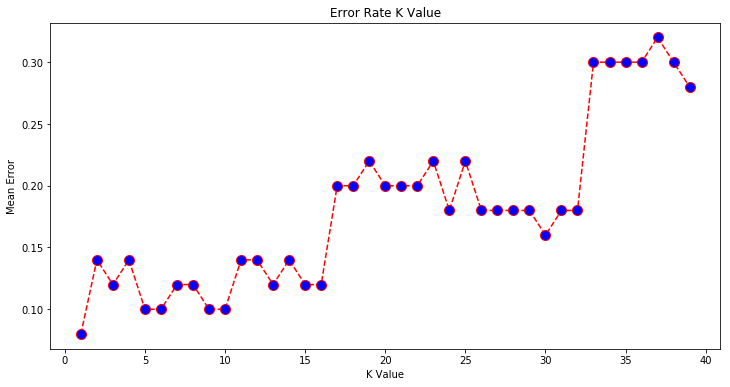

In [20]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  